In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
%%time
df = pd.read_csv('/Users/shivamsourav/Desktop/dataset.csv')

CPU times: user 13.4 s, sys: 2.74 s, total: 16.1 s
Wall time: 16.6 s


In [3]:
df.shape

(5956842, 24)

In [4]:
df.columns

Index(['Index', 'pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Source',
       'Water Temperature', 'Air Temperature', 'Month', 'Day', 'Time of Day',
       'Target'],
      dtype='object')

In [5]:
df.head(3)

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0


In [6]:
df['Target'].unique()

array([0, 1])

In [7]:
display(df.isnull().sum())

Index                          0
pH                        116054
Iron                       39753
Nitrate                   105725
Chloride                  175531
Lead                       26909
Zinc                      156126
Color                       5739
Turbidity                  49815
Fluoride                  189156
Copper                    199402
Odor                      178891
Sulfate                   197418
Conductivity              163861
Chlorine                   57825
Manganese                 109583
Total Dissolved Solids      1670
Source                     88262
Water Temperature         168233
Air Temperature            29728
Month                      95668
Day                        99603
Time of Day               114519
Target                         0
dtype: int64

In [8]:
df = df.drop(['Month','Day','Time of Day'],axis=1)

In [9]:
df.head(1)

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,1.626212,87.266538,471.683357,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,0


In [10]:
df['Color'].unique()

array(['Colorless', 'Faint Yellow', 'Light Yellow', 'Near Colorless',
       'Yellow', nan], dtype=object)

In [11]:
df['Source'].unique()

array([nan, 'Lake', 'River', 'Ground', 'Spring', 'Stream', 'Aquifer',
       'Reservoir', 'Well'], dtype=object)

In [12]:
df.shape

(5956842, 21)

In [13]:
df1 = df.copy()

In [14]:
col=['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc','Turbidity', 'Fluoride',
'Copper', 'Odor', 'Sulfate', 'Conductivity','Chlorine', 'Manganese', 'Total Dissolved Solids', 
'Water Temperature', 'Air Temperature']


for x in col:
    df1[x] = df1[x].fillna(df[x].median())

In [15]:
df1 = df1.drop(['Index'],axis=1)

# LABEL ENCODING 

In [16]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df1['Color'] = label.fit_transform(df1['Color'])
d1 = dict(zip(label.classes_,label.transform(label.classes_)))
print('Mapping of Color Attribute : ',d1)

df1['Source'] = label.fit_transform(df1['Source'])
d2 = dict(zip(label.classes_,label.transform(label.classes_)))
print('Mapping of Source Attribute : ',d2)

Mapping of Color Attribute :  {'Colorless': 0, 'Faint Yellow': 1, 'Light Yellow': 2, 'Near Colorless': 3, 'Yellow': 4, nan: 5}
Mapping of Source Attribute :  {'Aquifer': 0, 'Ground': 1, 'Lake': 2, 'Reservoir': 3, 'River': 4, 'Spring': 5, 'Stream': 6, 'Well': 7, nan: 8}


In [17]:
df1.isnull().sum()

pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Source                    0
Water Temperature         0
Air Temperature           0
Target                    0
dtype: int64

In [18]:
df1.head(4)

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Target
0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,0,0.022683,0.607283,0.144599,1.626212,87.266538,471.683357,3.708178,2.269945e-15,332.118789,8,16.444276,43.493324,0
1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,1,0.019007,0.622874,0.437835,1.686049,144.010981,432.844908,3.292038,8.024076e-07,284.641984,2,15.348981,71.220586,0
2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,2,0.319956,0.423423,0.431588,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,4,11.643467,44.891330,0
3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,3,0.166319,0.208454,0.239451,1.774284,147.163233,237.028467,3.516907,2.468295e-02,100.043838,1,10.092392,60.843233,0


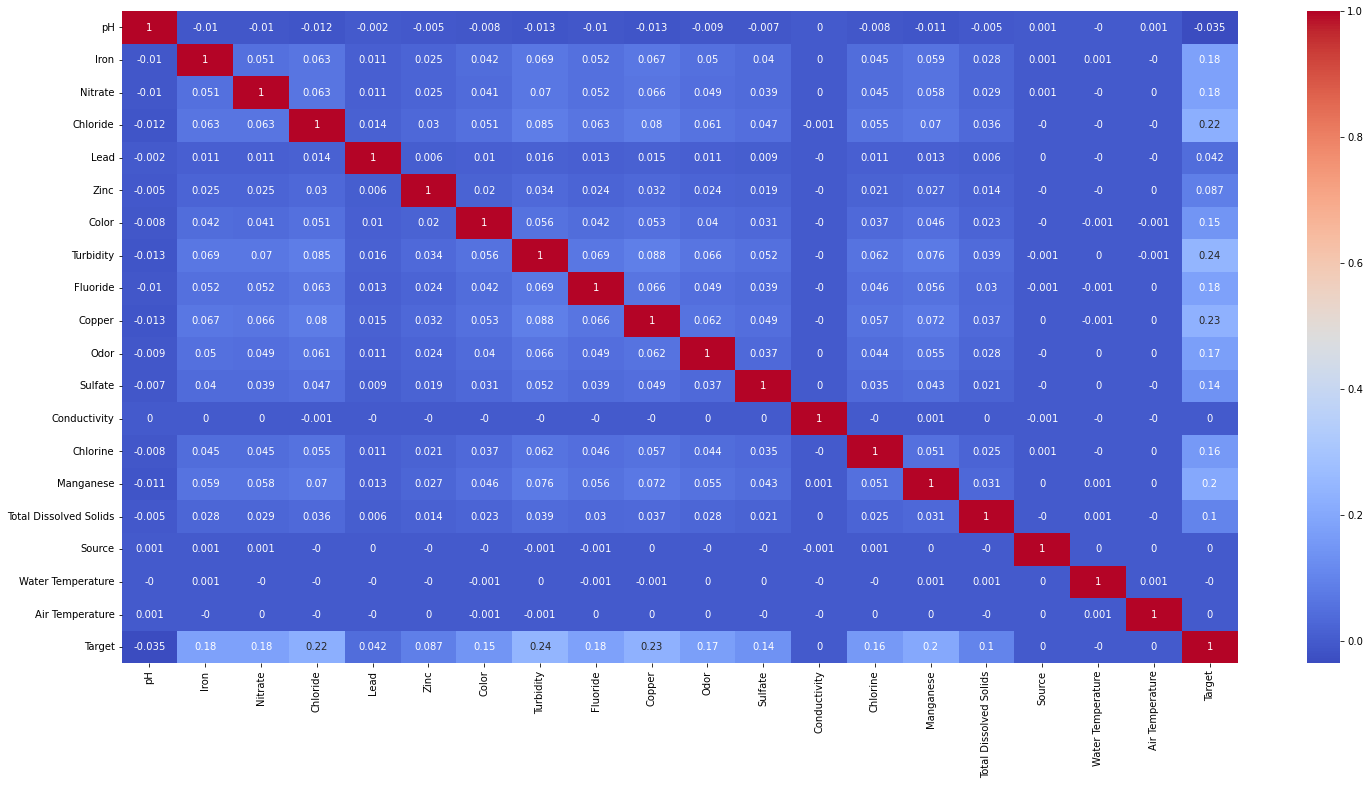

In [19]:
import seaborn as sns
plt.figure(figsize=(25,12))
sns.heatmap(round(df1.corr(),3),annot=True,cmap='coolwarm')
plt.show()

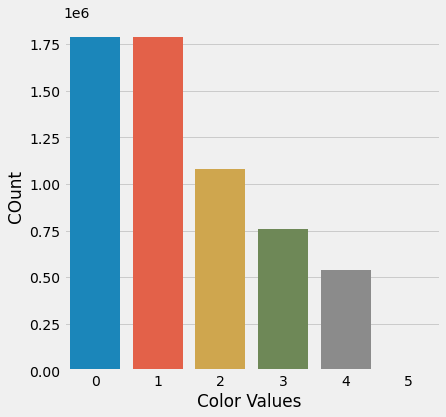

In [20]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,6))
sns.barplot(x=df1['Color'].unique(),y=df1['Color'].value_counts())
plt.xlabel('Color Values ')
plt.ylabel('COunt')
plt.show()

In [21]:
df['Color'].unique()

array(['Colorless', 'Faint Yellow', 'Light Yellow', 'Near Colorless',
       'Yellow', nan], dtype=object)

In [22]:
df1['Target'].value_counts()

0    4151590
1    1805252
Name: Target, dtype: int64

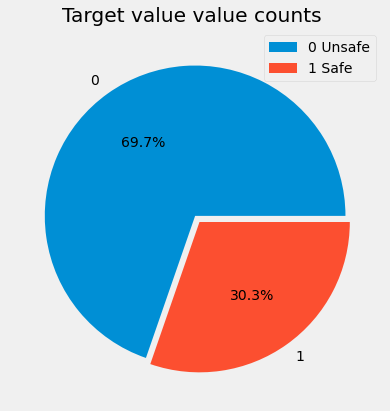

In [23]:
plt.figure(figsize=(6,6.5))
plt.pie(df1['Target'].value_counts(),labels=df1['Target'].unique(),autopct='%.1f%%',explode=[0,0.05])
plt.title("Target value value counts ")
plt.legend(['0 Unsafe','1 Safe'],loc='best')
plt.show()

<AxesSubplot:xlabel='pH', ylabel='Density'>

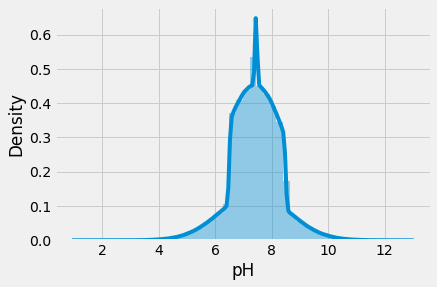

In [24]:
sns.distplot(df1['pH'])

<AxesSubplot:xlabel='Chlorine', ylabel='Density'>

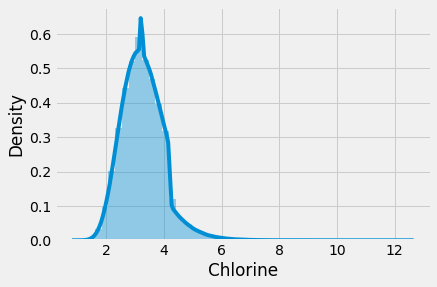

In [25]:
sns.distplot(df1['Chlorine'])

# As it shows no correlation with Target variable we drop Air Temperature,Water Temperature and Conductivity columns

In [26]:
df1 = df1.drop(['Air Temperature','Water Temperature','Conductivity'],axis=1)

In [27]:
df1.shape

(5956842, 17)

In [28]:
df2 = df1.copy()

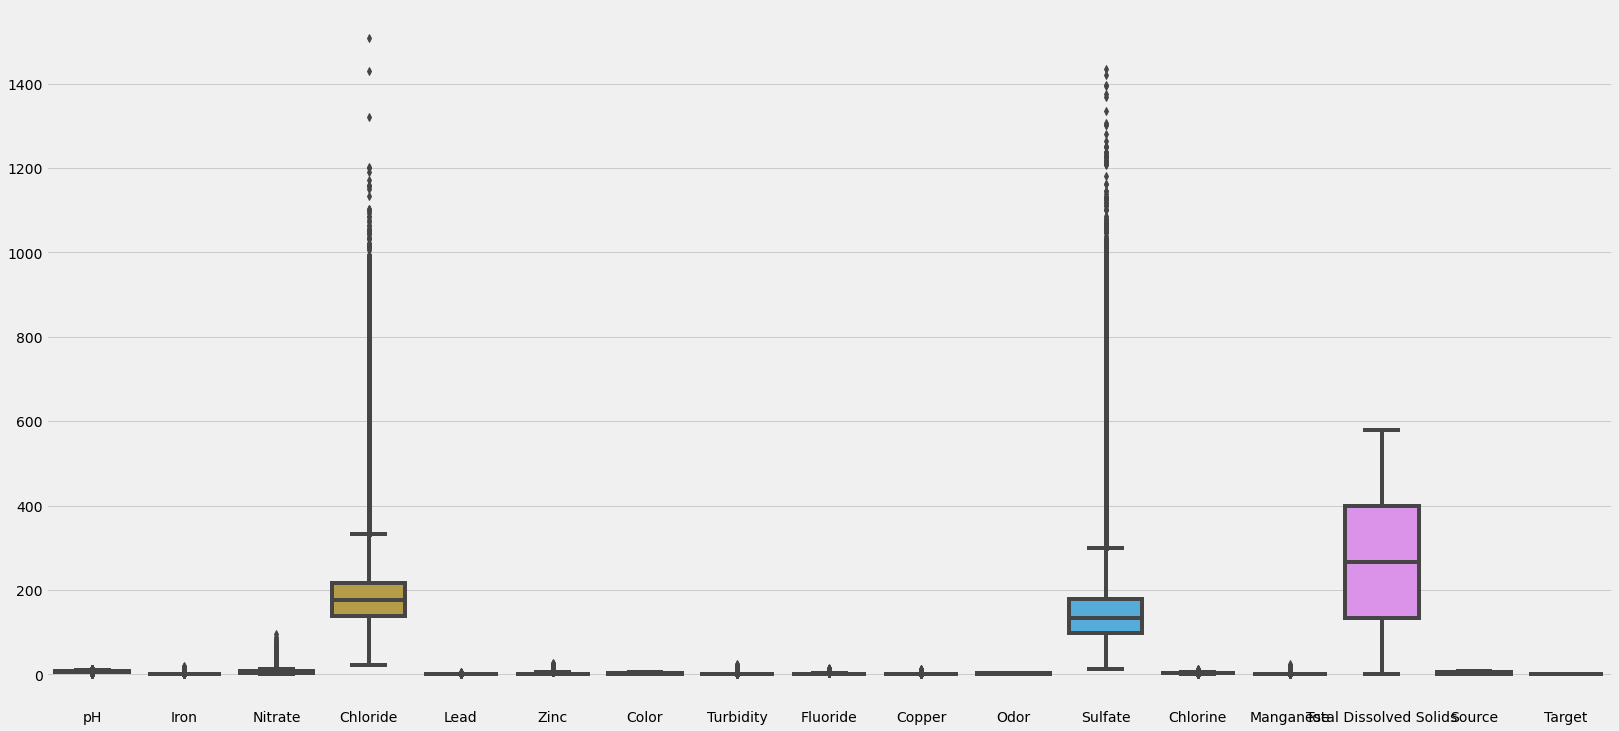

In [29]:
plt.figure(figsize=(25,12))
sns.boxplot(data=df1)
plt.show()

In [30]:
df1['Chloride'].describe().apply("{0:.5f}".format)

count    5956842.00000
mean         184.05302
std           67.42709
min           23.63919
25%          139.35096
50%          176.01781
75%          216.50917
max         1507.30988
Name: Chloride, dtype: object

In [31]:
df1['Sulfate'].describe().apply("{0:.5f}".format)

count    5956842.00000
mean         145.69772
std           67.67972
min           11.94073
25%           99.03477
50%          134.64887
75%          179.73320
max         1434.58654
Name: Sulfate, dtype: object

In [32]:
df1['Nitrate'].describe().apply("{0:.5f}".format)

count    5956842.00000
mean           6.15993
std            3.22850
min            0.28617
25%            4.00281
50%            5.60405
75%            7.62568
max           96.39078
Name: Nitrate, dtype: object

# SPLITTING TARGET VARIBALE(Y)

In [33]:
x=df1.drop(['Target'],axis=1)
y=df1['Target']

# TRAIN TEST SPLIT WITH (75% FOR TRAINING AND 25% FOR TRAINING)

In [34]:
from sklearnex.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [35]:
final_score=[]

In [36]:
from sklearn.metrics import f1_score,classification_report,confusion_matrix
from sklearn.metrics import log_loss,ConfusionMatrixDisplay,roc_curve,precision_recall_curve,accuracy_score

In [37]:
%%time
from sklearnex.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)
print('Train Score = ',log.score(X_train,y_train)*100)
print('Test Score = ' ,log.score(X_test,y_test)*100)

Train Score =  77.65504805566977
Test Score =  77.66367559734651
CPU times: user 15.5 s, sys: 7.19 s, total: 22.7 s
Wall time: 5.46 s


In [38]:
log_y_pred = log.predict(X_test)

In [39]:
print(classification_report(y_test,log_y_pred,target_names=['Not safe to drink','Safe to drink']))

                   precision    recall  f1-score   support

Not safe to drink       0.79      0.93      0.85   1038397
    Safe to drink       0.72      0.43      0.54    450814

         accuracy                           0.78   1489211
        macro avg       0.75      0.68      0.70   1489211
     weighted avg       0.77      0.78      0.76   1489211



In [40]:
final_score.append(accuracy_score(y_test,log_y_pred)*100)
print("Accuracy Score for Logistic Regression = ",accuracy_score(y_test,log_y_pred)*100)

Accuracy Score for Logistic Regression =  77.66367559734651


Text(0.5, 1.0, 'CONFUSION MATRIX FOR LOGISTIC REGRESSION')

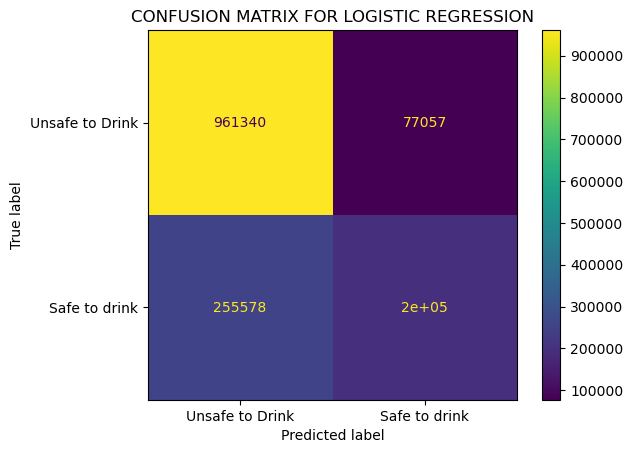

In [41]:
plt.rcParams.update(plt.rcParamsDefault)
cm = confusion_matrix(y_test,log_y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=['Unsafe to Drink','Safe to drink']).plot()
plt.title('CONFUSION MATRIX FOR LOGISTIC REGRESSION')

# XGBOOST CLASSIFIER

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective="binary:logistic")

In [43]:
xgb.fit(X_train,y_train,eval_metric='rmse',early_stopping_rounds=50,verbose=10,eval_set=[(X_test,y_test)])

[0]	validation_0-rmse:0.42683
[10]	validation_0-rmse:0.31212
[20]	validation_0-rmse:0.30853
[30]	validation_0-rmse:0.30677
[40]	validation_0-rmse:0.30597
[50]	validation_0-rmse:0.30513
[60]	validation_0-rmse:0.30496
[70]	validation_0-rmse:0.30467
[80]	validation_0-rmse:0.30465
[90]	validation_0-rmse:0.30451
[99]	validation_0-rmse:0.30417


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [44]:
score = xgb.feature_importances_

In [45]:
score_df = pd.DataFrame({'Attributes':X_test.columns,'Importance':score})
score_df = score_df.sort_values('Importance')

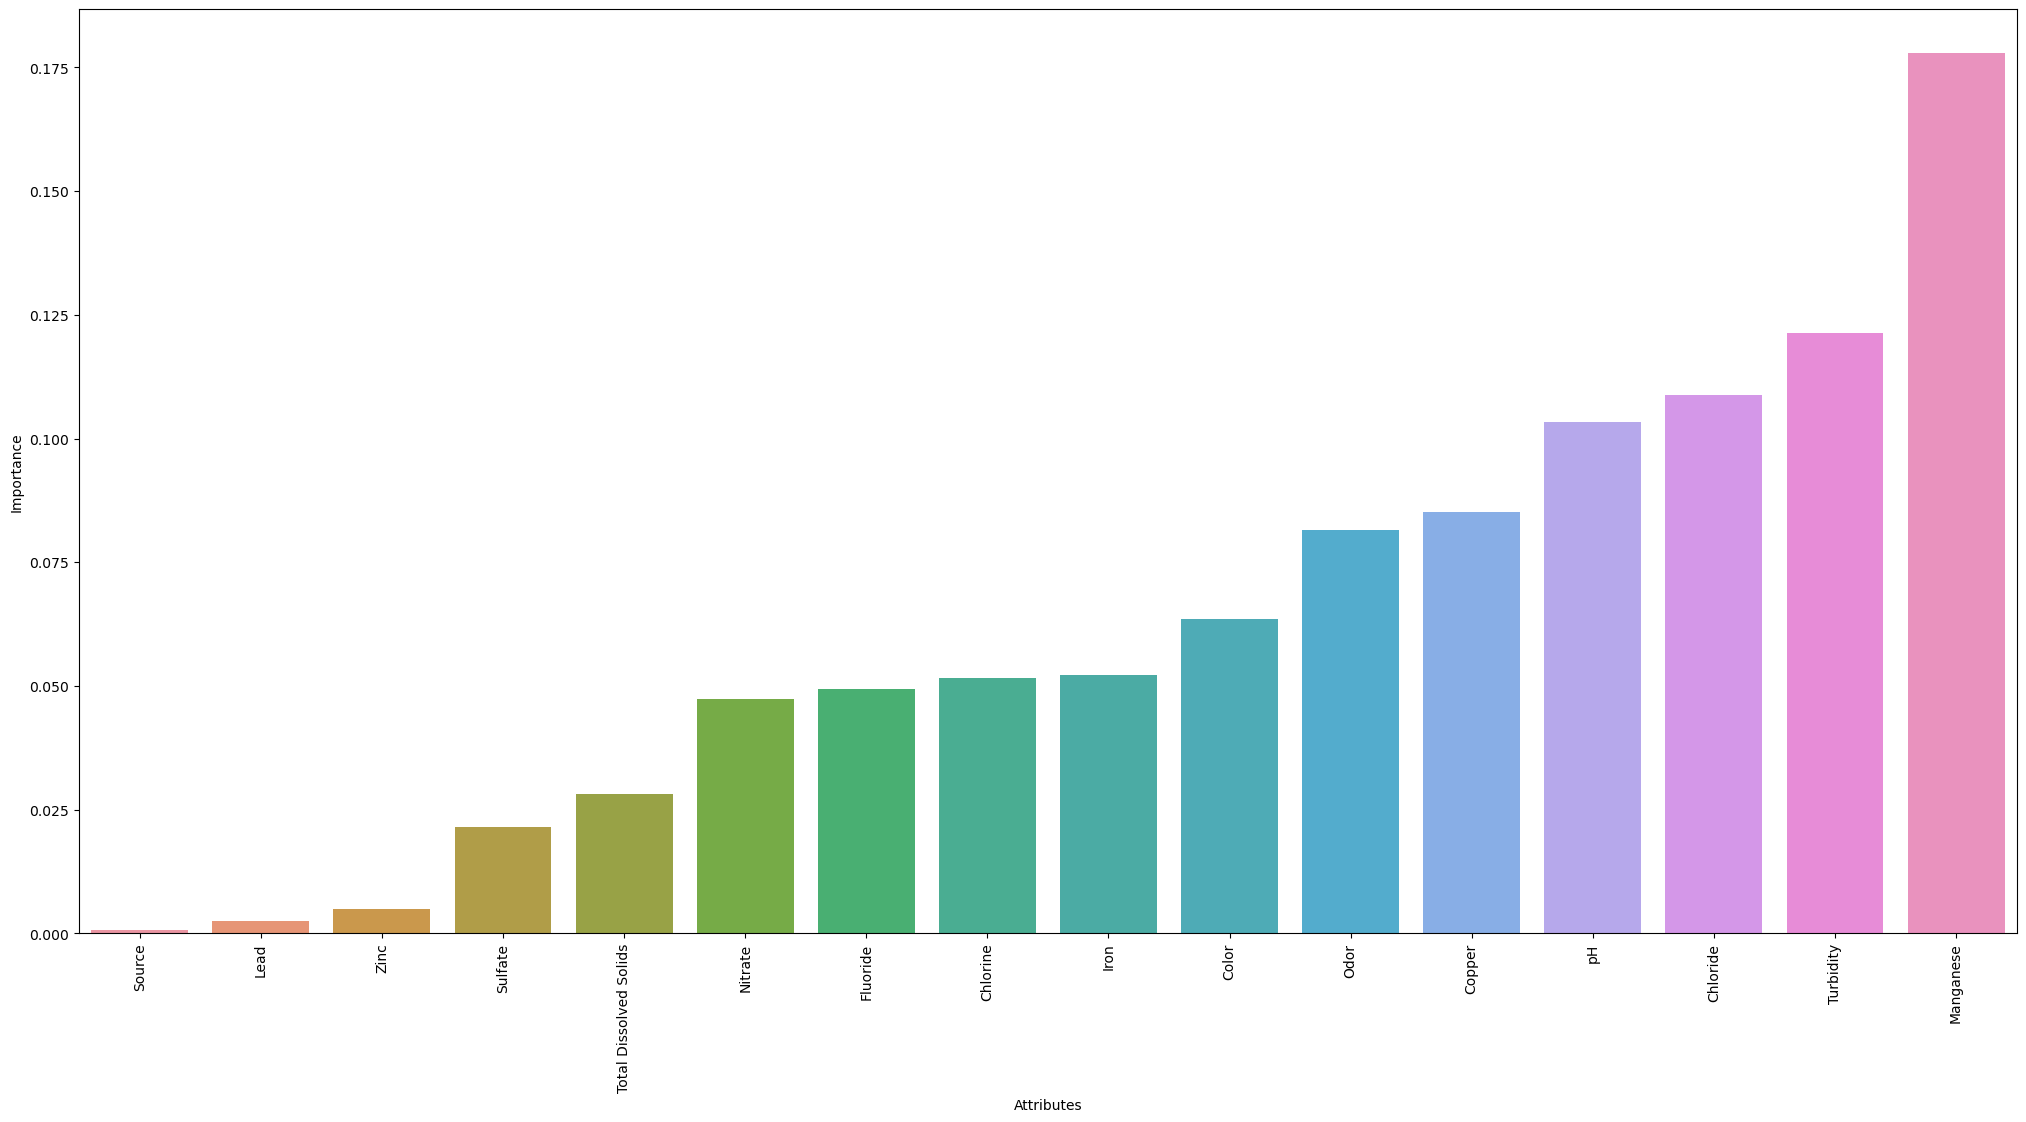

In [46]:
plt.figure(figsize=(25,12))
sns.barplot(x=score_df['Attributes'],y=score_df['Importance'])
plt.xticks(rotation=90)
plt.show()

In [47]:
y_pred = xgb.predict(X_test)

In [48]:
print(classification_report(y_test,y_pred,target_names=['Not Safe to drink', 'Safe to drink']))

                   precision    recall  f1-score   support

Not Safe to drink       0.95      0.85      0.90   1038397
    Safe to drink       0.73      0.90      0.80    450814

         accuracy                           0.87   1489211
        macro avg       0.84      0.88      0.85   1489211
     weighted avg       0.88      0.87      0.87   1489211



In [49]:
final_score.append(accuracy_score(y_test,log_y_pred)*100)
print("Accuracy Score = ",accuracy_score(y_pred,y_test)*100)

Accuracy Score =  86.78501568951613


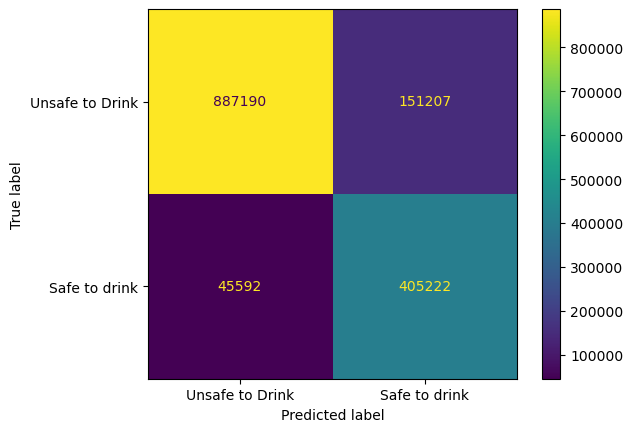

In [50]:
plt.rcParams.update(plt.rcParamsDefault)
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=['Unsafe to Drink','Safe to drink']).plot()

ROC AUC SCORE FOR XGBOOST CLASSIFIER :  0.9174393553968251
ROC AUC SCORE FOR LOGISTIC REGRESSION:  0.7902564195522968


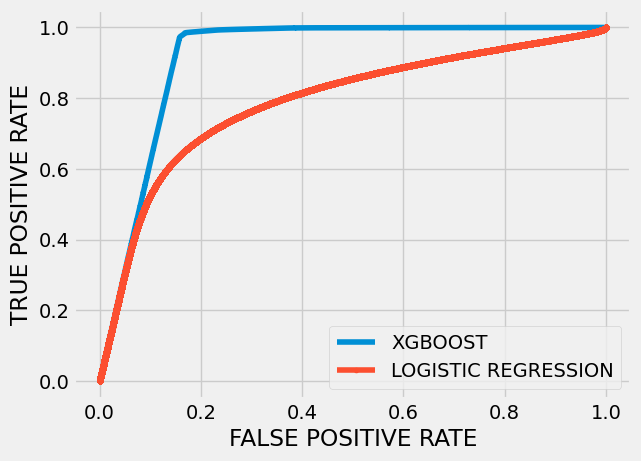

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probability = xgb.predict_proba(X_test)
plt.style.use('fivethirtyeight')

# keep probabilities for the positive outcome only
probability = probability[:, 1]

# calculate scores(fpr for false positive rate and tpr for true positive rate)
lr_auc = roc_auc_score(y_test, probability)
print('ROC AUC SCORE FOR XGBOOST CLASSIFIER : ',lr_auc)
lr_fpr, lr_tpr, _ = roc_curve(y_test, probability)
plt.plot(lr_fpr, lr_tpr, label='XGB')

probability = log.predict_proba(X_test)
probability = probability[:, 1]
lr_auc = roc_auc_score(y_test, probability)
print('ROC AUC SCORE FOR LOGISTIC REGRESSION: ',lr_auc)
lr_fpr, lr_tpr, _ = roc_curve(y_test, probability)
plt.plot(lr_fpr, lr_tpr, marker='.', label='LOGISTIC')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend(['XGBOOST','LOGISTIC REGRESSION'])
plt.show()

# DECISION TREE CLASSIFIER

In [52]:
%%time
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

CPU times: user 5min 26s, sys: 1.01 s, total: 5min 27s
Wall time: 5min 27s


DecisionTreeClassifier()

In [55]:
y_pred = dtc.predict(X_test)
print('Accuracy of Decision Tree = ',accuracy_score(y_pred,y_test)*100)

Accuracy of Decision Tree =  83.20278321876484


In [60]:
print(classification_report(y_test,y_pred,target_names=['Not Safe to drink', 'Safe to drink']))

                   precision    recall  f1-score   support

Not Safe to drink       0.88      0.88      0.88   1038397
    Safe to drink       0.73      0.72      0.72    450814

         accuracy                           0.83   1489211
        macro avg       0.80      0.80      0.80   1489211
     weighted avg       0.83      0.83      0.83   1489211



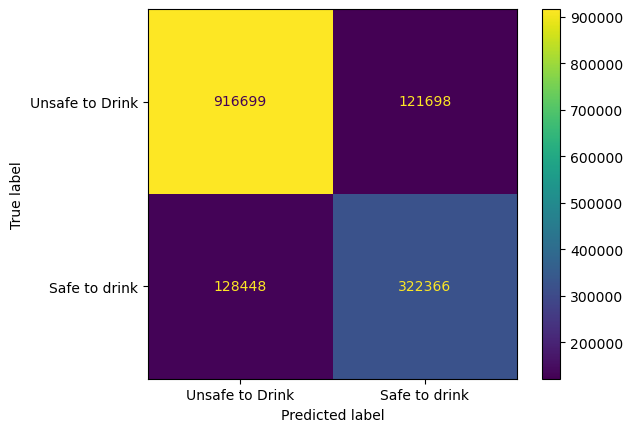

In [61]:
plt.rcParams.update(plt.rcParamsDefault)
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=['Unsafe to Drink','Safe to drink']).plot()

ROC AUC SCORE FOR DECISION TREE CLASSIFIER = :  0.798938723323193


Text(0, 0.5, 'TRUE POSITIVE RATE')

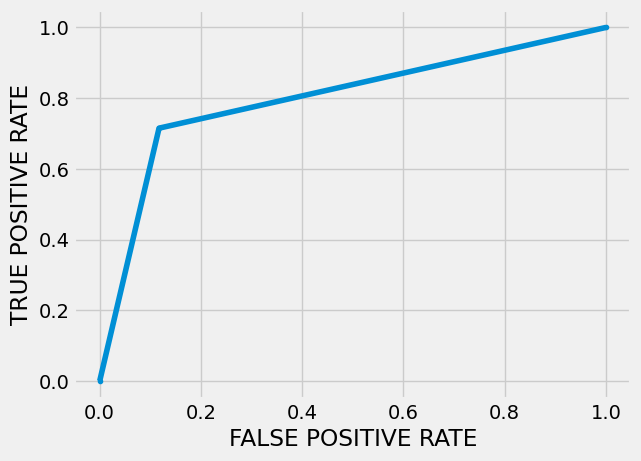

In [74]:
plt.style.use('fivethirtyeight')
probability = dtc.predict_proba(X_test)
probability = probability[:, 1]
lr_auc = roc_auc_score(y_test, probability)
print('ROC AUC SCORE FOR DECISION TREE CLASSIFIER = : ',lr_auc)
lr_fpr, lr_tpr, _ = roc_curve(y_test, probability)
plt.plot(lr_fpr, lr_tpr, marker='.', label='DECISION TREE')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')

# RANDOM FOREST CLASSIFIER

In [62]:
%%time
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

CPU times: user 20min 35s, sys: 7min 16s, total: 27min 51s
Wall time: 5min 14s


RandomForestClassifier()

In [63]:
rfc_y_pred = rfc.predict(X_test)
print("Accuracy Score of Random Forest = ",accuracy_score(rfc_y_pred,y_test))

Accuracy Score of Random Forest =  0.8871885850964034


In [64]:
print(classification_report(y_test,rfc_y_pred,target_names=['Not Safe to drink', 'Safe to drink']))

                   precision    recall  f1-score   support

Not Safe to drink       0.99      0.85      0.91   1038397
    Safe to drink       0.74      0.97      0.84    450814

         accuracy                           0.89   1489211
        macro avg       0.86      0.91      0.88   1489211
     weighted avg       0.91      0.89      0.89   1489211



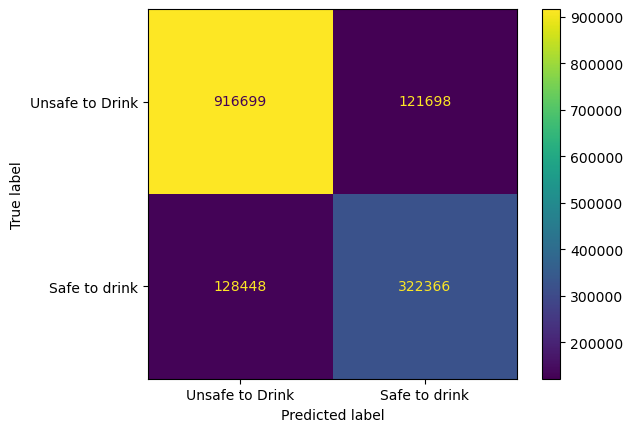

In [65]:
plt.rcParams.update(plt.rcParamsDefault)
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=['Unsafe to Drink','Safe to drink']).plot()

ROC AUC SCORE FOR RANDOM FOREST CLASSIFIER = :  0.9253601648687287


Text(0, 0.5, 'TRUE POSITIVE RATE')

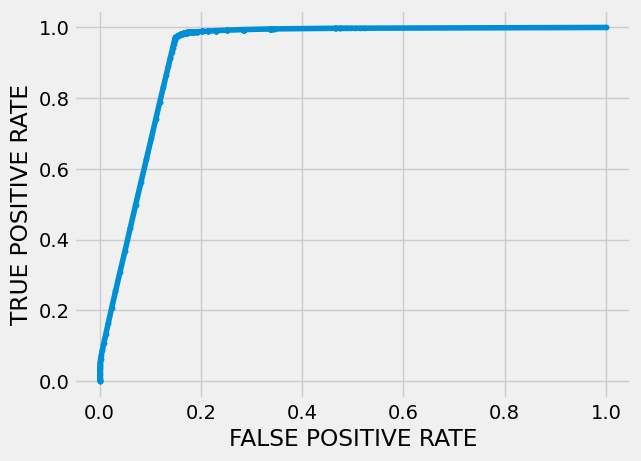

In [69]:
plt.style.use('fivethirtyeight')
probability = rfc.predict_proba(X_test)
probability = probability[:, 1]
lr_auc = roc_auc_score(y_test, probability)
print('ROC AUC SCORE FOR RANDOM FOREST CLASSIFIER = : ',lr_auc)
lr_fpr, lr_tpr, _ = roc_curve(y_test, probability)
plt.plot(lr_fpr, lr_tpr, marker='.', label='RANDOM FOREST')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')

# RANDOM FOREST CLASSIFIER AND XGBOOST HAVE SIMILAR ACCURACY AND ROC AUC VALUE BUT WE SELECT XGBOOST

# SAVING XGBOOST CLASSSIFIER MODEL TO A PICKLE FILE

In [71]:
import pickle
f = open('intel_smit.pkl','wb')
pickle.dump(xgb,f)
f.close()

In [72]:
# We can take user input as well as a list
arr = np.array(X_test.iloc[4])

In [73]:
f = open('intel_smit.pkl','rb')
new_model = pickle.load(f)
df = pd.DataFrame([arr] , columns = new_model.feature_names_in_)
a = new_model.predict(df)
if a==[0]:
    print("UNSAFE FOR DRINKING")
else:
    print("SAFE FOR DRINKING")

f.close()

UNSAFE FOR DRINKING
